<a href="https://colab.research.google.com/github/ssvakil/Machine-Learning-in-Python-Workshop/blob/master/TransBTSV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bcolz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 12.9 MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp38-cp38-linux_x86_64.whl size=2873196 sha256=8043919e91e829b51f66961fbedb4adce0913301bda1dcc9a55f25aa840fb398
  Stored in directory: /root/.cache/pip/wheels/c8/f3/3b/5cf5f3997e4729700f17eb4faa8eb7dde1a209cdea66371b7a
Successfully built bcolz


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [ ]:
import os
import glob
import shutil
import random
from tqdm import tqdm


def create_validation_data(trn_dir, val_dir, split=0.1):
    if not os.path.exists(val_dir):
        os.mkdir(val_dir)
        
    train_ds = glob.glob(trn_dir + '/*/*.png')
    print(len(train_ds))
    
    valid_sz = int(split * len(train_ds)) if split < 1.0 else split 
    
    valid_ds = random.sample(train_ds, valid_sz)
    print(len(valid_ds))
    
    for fname in tqdm(valid_ds):
        basename = os.path.basename(fname)
        label = fname.split('\\')[-2]
        src_folder = os.path.join(trn_dir, label)
        tgt_folder = os.path.join(val_dir, label)
        if not os.path.exists(tgt_folder):
            os.mkdir(tgt_folder)
        shutil.move(os.path.join(src_folder, basename), os.path.join(tgt_folder, basename))
		

def pseudo_label(probs, tst_dir, test_dl, class_names, threshold=0.99999):
    num_data = len(test_dl.dataset)
    preds = np.argmax(probs, axis=1)
    candidate_idxs = np.arange(num_data)[probs.max(axis=1) >= threshold]
    
    fnames = [f[0].split('\\')[-1] for f in test_dl.dataset.imgs]
    imgs = [fnames[i] for i in candidate_idxs]
    labels = [class_names[preds[i]] for i in candidate_idxs]
    
    dest_folder = os.path.join(DATA_DIR, 'pseudo', 'train')
        
    for _, (img, label) in tqdm(enumerate(zip(imgs, labels))):
        src = os.path.join(tst_dir, 'unk', img)
        dst = os.path.join(dest_folder, label, img)
        if not os.path.exists(dst):
            shutil.copyfile(src, dst)

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


use_gpu = torch.cuda.is_available()

def load_pretrained_resnet18(model_path=None, num_classes=10):
    if model_path is None:
        model = models.resnet18(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
            
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.resnet18(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_resnet34(model_path=None, num_classes=10):
    if model_path is None:
        model = models.resnet34(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.resnet34(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_resnet50(model_path=None, num_classes=10):
    if model_path is None:
        model = models.resnet50(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.resnet50(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_resnet101(model_path=None, num_classes=10):
    if model_path is None:
        model = models.resnet101(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.resnet101(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_resnet152(model_path=None, num_classes=10):
    if model_path is None:
        model = models.resnet152(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.resnet152(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_inception3(model_path=None, num_classes=10):
    if model_path is None:
        model = models.inception_v3(pretrained=False, num_classes=num_classes, aux_logits=False)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.inception_v3(pretrained=False, num_classes=num_classes, aux_logits=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_densenet121(model_path=None, num_classes=10):
    if model_path is None:
        model = models.densenet121(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.densenet121(pretrained=False)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_densenet161(model_path=None, num_classes=10):
    if model_path is None:
        model = models.densenet161(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.densenet161(pretrained=False)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model


def load_pretrained_densenet169(model_path=None, num_classes=10):
    if model_path is None:
        model = models.densenet169(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.densenet169(pretrained=False)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model

def load_pretrained_densenet201(model_path=None, num_classes=10):
    if model_path is None:
        model = models.densenet201(pretrained=True)
        for param in model.parameters():
            param.require_grad = False
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    else:
        model = models.densenet201(pretrained=False)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
        model.load_state_dict(torch.load(model_path))
    
    if use_gpu:
        model = model.cuda()
        
    return model

In [ ]:
import re
import os
import glob
import numpy as np
from tqdm import tqdm

import torch
import torch.nn.functional as F
import torchvision.models as models

#from model_utils import *


def predict_proba(model, dataloader, device=None):
    """ Predict probabilty of classes.
    
        Inputs:
            - model: a pytorch model (eg., a neural network).
            - dataloader: a pytorch dataloder to load data and provide batches to the model.
            - report_every: how often this function should print out statistics.
            
        Output:
            - predictions: a numpy array containing predicted probabilities for all of the data.
    
    """
    model.eval()
    predictions = []
    y_true = []

    with torch.no_grad():
        for inputs, targets in tqdm(dataloader):
            inputs = inputs.to(device)
            outputs = model(inputs)
            scores = F.softmax(outputs, dim=1)
            predictions += [scores.cpu().numpy()]
            y_true += [targets.cpu().numpy()]

    predictions = np.concatenate(predictions)
    y_true = np.concatenate(y_true)
    return predictions, y_true


def TTA(model, dl, tta_dl, device=None, is_test=False, n=5):
    probs = predict_proba(model, dl, device)
    probs = np.stack([probs] + [predict_proba(model, tta_dl) for i in range(n)]).mean(axis=0)
    y_true = np.concatenate([labels.cpu().numpy() for _, labels in tta_dl]) if not is_test else None
    return probs, y_true


def predict_proba_five_ten_crop(model, dataloader, device):
    """ Predict probabilty of classes.
    
        Inputs:
            - model: a pytorch model (eg., a neural network).
            - dataloader: a pytorch dataloder to load data and provide batches to the model.
            - report_every: how often this function should print out statistics.
            
        Output:
            - predictions: a numpy array containing predicted probabilities for all of the data.
    
    """
    model.eval()
    predictions = []

    with torch.no_grad():
        for inputs, _ in tqdm(dataloader):
            inputs = inputs.to(device)
            bs, ncrops, c, h, w = inputs.size()
            outputs = model(inputs.view(-1, c, h, w))
            outputs = outputs.view(bs, ncrops, -1).mean(1)
            scores = F.softmax(outputs, dim=1)
            predictions += [scores.cpu().numpy()]
    
    predictions = np.concatenate(predictions)
    return predictions


def predict_class(model, dataloader, device):
    """ Predict probabilities for the given model and dataset
    """
    model.eval()
    result = []
    y = []
    
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader):
            inputs = inputs.to(device)
            scores = model(inputs)
            _, preds = torch.max(scores, 1)
            result += [preds.cpu().numpy()]
            y += [targets.cpu().numpy()]
        
    result = np.concatenate(result)
    y = np.concatenate(y)
    return result, y


def predict_class_names(model, dataloader, class_names, device):
    """ Predict probabilities for the given model and dataset
    
        Inputs:
            - model: a pytorch model
            - dataloader a torch.utils.data.DataLoader object
            - class_names: a list of class names
            
        Output:
            - result: Predicted class name for each input as a python list
    """
    model.eval()
    result = []
    y = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            scores = model(inputs)
            _, preds = torch.max(scores, 1)
            result += [preds.cpu().numpy()]
            y += [labels.cpu().numpy()]
    
    result = np.concatenate(result)
    y = np.concatenate(y)
    
    pred_class_names = [class_names[i] for i in result]
    return pred_class_names, y


def predict_probs_for_models_from_folder(dataloader, models_dir="./models", num_classes=10, device=None):
    model_fnames = glob.glob(models_dir + '/*.pth') + glob.glob(models_dir + '/*.h5')
    for i in range(1):
        for model_fname in model_fnames:
            basename = os.path.basename(model_fname)[:-3]
            first_dash_idx = basename.find('-')
            second_dash_idx = basename.find('-', first_dash_idx + 1)
            model_name = basename[first_dash_idx + 1: second_dash_idx].lower()
            
            print('Predicting ouputs for %s...' % model_name)
            
            if model_name == 'resnet18':
                model = load_pretrained_resnet18(model_fname, num_classes)
            elif model_name == 'resnet34':
                model = load_pretrained_resnet34(model_fname, num_classes)
            elif model_name == 'resnet50':
                model = load_pretrained_resnet50(model_fname, num_classes)
            elif model_name == 'densenet121':
                model = load_pretrained_densenet121(model_fname, num_classes)
            elif model_name == 'densenet161':
                model = load_pretrained_densenet161(model_fname, num_classes)
            elif model_name == 'densenet169':
                model = load_pretrained_densenet169(model_fname, num_classes)
            elif model_name == 'densenet201':
                model = load_pretrained_densenet201(model_fname, num_classes)
            else:
                raise NameError('Inavalid model name: {}'.format(model_name))
            
            # predic and save probabilities for this model in the models_dir
            model = model.to(device)
            probs = predict_proba_five_ten_crop(model, dataloader, device)
            probs_fname = os.path.join(models_dir, "{}-{}.npy".format(basename, i))
            np.save(probs_fname, probs)

In [ ]:
import os
import sys
import time
import torch
import torch.nn as nn


def train_one_epoch(model, dataloder, criterion, optimizer, device):    
    model.train()
        
    steps = len(dataloder.dataset) // dataloder.batch_size
    
    running_loss = 0.0
    running_corrects = 0
    
    for i, (inputs, labels) in enumerate(dataloder):
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        # forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # statistics
        running_loss  = (running_loss * i + loss.item()) / (i + 1)
        running_corrects += torch.sum(outputs.argmax(1) == labels)
        
        # report
        sys.stdout.flush()
        sys.stdout.write("\r  Step %d/%d | Loss: %.5f" % (i, steps, loss.item()))
        
    epoch_loss = running_loss
    epoch_acc = running_corrects / len(dataloder.dataset)
    
    sys.stdout.flush()
    print('\r{} Loss: {:.5f} Acc: {:.5f}'.format('  train', epoch_loss, epoch_acc))
    
    return model

    
def validate_model(model, dataloder, criterion, device):
    model.eval()
    
    steps = len(dataloder.dataset) // dataloder.batch_size
    
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloder):
            inputs, labels = inputs.to(device), labels.to(device)

            # forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # statistics
            running_loss  = (running_loss * i + loss.item()) / (i + 1)
            running_corrects += torch.sum(outputs.argmax(1) == labels)

            # report
            sys.stdout.flush()
            sys.stdout.write("\r  Step %d/%d | Loss: %.5f" % (i, steps, loss.item()))
        
    epoch_loss = running_loss
    epoch_acc = running_corrects / len(dataloder.dataset)
    
    sys.stdout.flush()
    print('\r{} Loss: {:.5f} Acc: {:.5f}'.format('  valid', epoch_loss, epoch_acc))
    
    return epoch_acc


def train_model(model, train_dl, valid_dl, criterion, optimizer, device,
                scheduler=None, num_epochs=10):

    if not os.path.exists('models'):
        os.mkdir('models')
    
    device = device or torch.device('cpu')

    since = time.time()
       
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)

        ## train and validate
        model = train_one_epoch(model, train_dl, criterion, optimizer, device)
        val_acc = validate_model(model, valid_dl, criterion, device)
        if scheduler is not None:
            scheduler.step()
       
        # deep copy the model
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()
            torch.save(best_model_wts, "./models/epoch-{}-acc-{:.5f}.pth".format(epoch, best_acc))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as T
import bcolz


def save_array(fname, arr): 
    c = bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

    
def load_array(fname):
    return bcolz.open(fname)[:]


# def to_var(x, volatile=False):
#     if torch.cuda.is_available():
#         x = x.cuda()
#     return Variable(x, volatile=volatile)


def create_img_dataloader(image_folder, transform=None, batch_size=25, shuffle=False, num_workers=2):
    if transform is None:
        transform = T.Compose([
            T.Resize((224, 224)),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        
    img_dataset = datasets.ImageFolder(image_folder, transform)
    img_dataloader = torch.utils.data.DataLoader(img_dataset, batch_size, shuffle, num_workers)
    return img_dataset, img_dataloader

In [ ]:
import itertools
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix


def imshow(inp, title=None):
    """Imshow for Tensor.
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)


def visualize_model(model, dataloader, device, num_images=6):
    """ Visulaize the prediction of the model on a bunch of random data.
    """
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(10., 8.))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(dataloader.dataset.classes[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    return

def plot_errors(model, dataloader, device):
    model.eval()
    plt.figure(figsize=(12, 24))
    count = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            incorrect_idxs = np.flatnonzero(preds.cpu().numpy() != labels.cpu().numpy())

            for idx in incorrect_idxs:
                count += 1
                if count > 30: break
                ax = plt.subplot(10, 3, count)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(dataloader.dataset.classes[preds[idx]]))
                imshow(inputs.cpu().data[idx])
    
    plt.show()

    print("{} images out of {} were misclassified.".format(count, len(dataloader.dataset)))


def ceildiv(a, b):
    return -(-a // b)


def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None, maintitle=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3): ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    if maintitle is not None:
        plt.suptitle(maintitle, fontsize=16)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, ceildiv(len(ims), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plots images given image files.
    
    Arguments:
        im_paths (list): list of paths
        figsize (tuple): figure size
        rows (int): number of rows
        titles (list): list of titles
        maintitle (string): main title
    """
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=16)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)


def plot_confusion_matrix(cm, classes, normalize=False, figsize=(12, 12), title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot = "%.2f" % cm[i, j] if cm[i, j] > 0 else "" 
        plt.text(j, i, annot, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plots_raw(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, ceildiv(len(ims), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx, path): return np.array(PIL.Image.open(os.path.join(path, ds.fnames[idx])))


class ImageModelResults():
    """ Visualize the results of an image model
    
    Arguments:
        ds (dataset): a dataset which contains the images
        log_preds (numpy.ndarray): predictions for the dataset in log scale
        
    Returns:
        ImageModelResults
    """
    def __init__(self, ds, log_preds):
        """Initialize an ImageModelResults class instance"""
        self.ds = ds
        # returns the indices of the maximum value of predictions along axis 1, representing the predicted class
        self.preds = np.argmax(log_preds, axis=1)
        # computes the probabilities
        self.probs = np.exp(log_preds)
        # extracts the number of classes
        self.num_classes = log_preds.shape[1]

    def plot_val_with_title(self, idxs, y):
        """ Displays the images and their probabilities of belonging to a certain class
            
            Arguments:
                idxs (numpy.ndarray): indexes of the image samples from the dataset
                y (int): the selected class
                
            Returns:
                Plots the images in n rows [rows = n]
        """
        # if there are any samples to be displayed
        if len(idxs) > 0:
            imgs = np.stack([self.ds[x][0] for x in idxs])
            title_probs = [self.probs[x,y] for x in idxs]

            return plots(self.ds.denorm(imgs), rows=1, titles=title_probs)
        # if idxs is empty return false
        else:
            return False;

    def most_by_mask(self, mask, y, mult):
        """ Extracts the first 4 most correct/incorrect indexes from the ordered list of probabilities
        
            Arguments:
                mask (numpy.ndarray): the mask of probabilities specific to the selected class; a boolean array with shape (num_of_samples,) which contains True where class==selected_class, and False everywhere else
                y (int): the selected class
                mult (int): sets the ordering; -1 descending, 1 ascending
                
            Returns:
                idxs (ndarray): An array of indexes of length 4
        """
        idxs = np.where(mask)[0]
        return idxs[np.argsort(mult * self.probs[idxs,y])[:4]]

    def most_uncertain_by_mask(self, mask, y):
        """ Extracts the first 4 most uncertain indexes from the ordered list of probabilities
            
            Arguments:
                mask (numpy.ndarray): the mask of probabilities specific to the selected class; a boolean array with shape (num_of_samples,) which contains True where class==selected_class, and False everywhere else
                y (int): the selected class
            
            Returns:
                idxs (ndarray): An array of indexes of length 4
        """
        idxs = np.where(mask)[0]
        # the most uncertain samples will have abs(probs-1/num_classes) close to 0;
        return idxs[np.argsort(np.abs(self.probs[idxs,y]-(1/self.num_classes)))[:4]]
    
    def most_by_correct(self, y, is_correct):
        """ Extracts the predicted classes which correspond to the selected class (y) and to the specific case (prediction is correct - is_true=True, prediction is wrong - is_true=False)
            
            Arguments:
                y (int): the selected class
                is_correct (boolean): a boolean flag (True, False) which specify the what to look for. Ex: True - most correct samples, False - most incorrect samples
            
            Returns:
                idxs (numpy.ndarray): An array of indexes (numpy.ndarray)
        """
        # mult=-1 when the is_correct flag is true -> when we want to display the most correct classes we will make a descending sorting (argsort) because we want that the biggest probabilities to be displayed first.
        # When is_correct is false, we want to display the most incorrect classes, so we want an ascending sorting since our interest is in the smallest probabilities.
        mult = -1 if is_correct==True else 1
        return self.most_by_mask(((self.preds == self.ds.y)==is_correct)
                                 & (self.ds.y == y), y, mult)

    def plot_by_correct(self, y, is_correct):
        """ Plots the images which correspond to the selected class (y) and to the specific case (prediction is correct - is_true=True, prediction is wrong - is_true=False)
            
            Arguments:
                y (int): the selected class
                is_correct (boolean): a boolean flag (True, False) which specify the what to look for. Ex: True - most correct samples, False - most incorrect samples
        """    
        return self.plot_val_with_title(self.most_by_correct(y, is_correct), y)

    def most_by_uncertain(self, y):
        """ Extracts the predicted classes which correspond to the selected class (y) and have probabilities nearest to 1/number_of_classes (eg. 0.5 for 2 classes, 0.33 for 3 classes) for the selected class.
            
            Arguments:
                y (int): the selected class
            
            Returns:
                idxs (numpy.ndarray): An array of indexes (numpy.ndarray)
        """
        return self.most_uncertain_by_mask((self.ds.y == y), y)

    def plot_most_correct(self, y):
        """ Plots the images which correspond to the selected class (y) and are most correct.
            
            Arguments:
                y (int): the selected class
        """
        return self.plot_by_correct(y, True)
    
    def plot_most_incorrect(self, y): 
        """ Plots the images which correspond to the selected class (y) and are most incorrect.
            
            Arguments:
                y (int): the selected class
        """
        return self.plot_by_correct(y, False)
    
    def plot_most_uncertain(self, y):
        """ Plots the images which correspond to the selected class (y) and are most uncertain i.e have probabilities nearest to 1/number_of_classes.
            
            Arguments:
                y (int): the selected class
        """
        return self.plot_val_with_title(self.most_by_uncertain(y), y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/TransBTSV2/data/data4'
sz = 224
batch_size = 32
os.listdir(DATA_DIR)

### ['train', 'test', 'val']

trn_dir = f'{DATA_DIR}/train'
test_dir = f'{DATA_DIR}/test'


Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/TransBTSV2/data/data4/train'

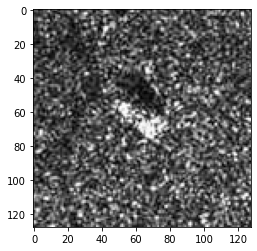

In [ ]:
os.listdir(trn_dir)
### ['BRDM_2', '2S1', 'SLICY_30', 'ZSU_23_4', 'T72']


os.listdir(test_dir)
### ['2S1', 'BRDM_2', 'SLICY_45', 'ZSU_23_4', 'T72_A64']

trn_fnames = glob.glob(f'{trn_dir}/*/*.JPG')
trn_fnames[:5]
img = plt.imread(trn_fnames[3])
plt.imshow(img);

train_ds = datasets.ImageFolder(trn_dir)
train_ds.classes
### ['2S1', 'BRDM_2', 'SLICY_30', 'T72', 'ZSU_23_4']

train_ds.class_to_idx
### {'2S1': 0, 'BRDM_2': 1, 'SLICY_30': 2, 'T72': 3, 'ZSU_23_4': 4}

train_ds.root

In [ ]:
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
test_ds = datasets.ImageFolder(test_dir, transform=tfms)

In [ ]:
train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=batch_size, 
                                       shuffle=True, 
                                       num_workers=2)

test_dl= torch.utils.data.DataLoader(test_ds, 
                                       batch_size=batch_size, 
                                       shuffle=False, 
                                       num_workers=2)

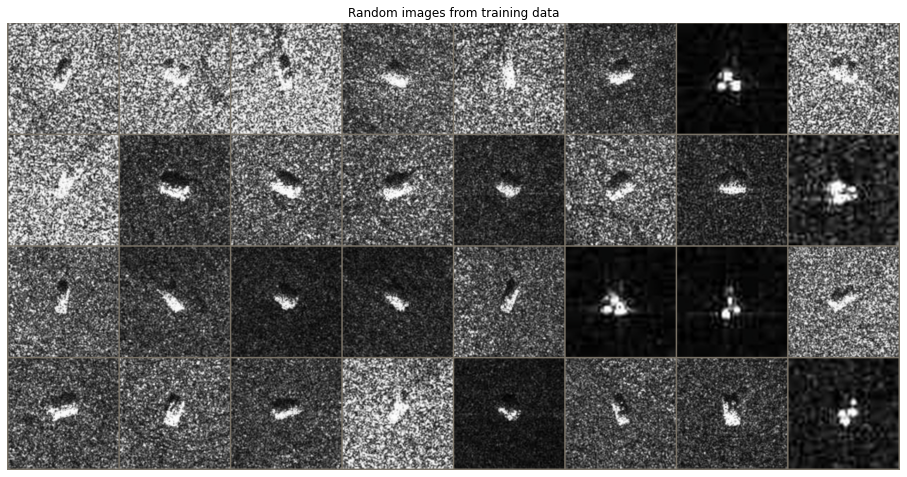

In [ ]:
inputs, targets = next(iter(train_dl))
out = torchvision.utils.make_grid(inputs, padding=3)
plt.figure(figsize=(16, 12))
imshow(out, title='Random images from training data')

In [ ]:
class SimpleCNN(nn.Module):
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Linear(56 * 56 * 32, 5)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)            # (bs, C, H,  W)
        out = out.view(out.size(0), -1)  # (bs, C * H, W)
        out = self.fc(out)
        return out

In [ ]:
model = SimpleCNN()

# transfer model to GPU, if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

In [ ]:
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # forwad pass
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
        losses.append(loss.item())

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.item()))

Epoch [ 1/10], Step [ 50/ 56], Loss: 3.0431
Epoch [ 2/10], Step [ 50/ 56], Loss: 0.4587
Epoch [ 3/10], Step [ 50/ 56], Loss: 0.1569
Epoch [ 4/10], Step [ 50/ 56], Loss: 0.0957
Epoch [ 5/10], Step [ 50/ 56], Loss: 0.0328
Epoch [ 6/10], Step [ 50/ 56], Loss: 0.0982
Epoch [ 7/10], Step [ 50/ 56], Loss: 0.0118
Epoch [ 8/10], Step [ 50/ 56], Loss: 0.0191
Epoch [ 9/10], Step [ 50/ 56], Loss: 0.0756
Epoch [10/10], Step [ 50/ 56], Loss: 0.0696


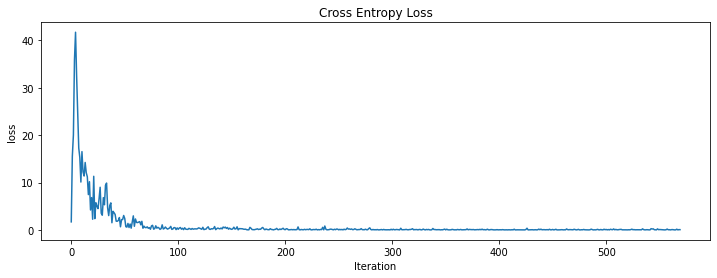

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

In [ ]:
def evaluate_model(model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
    
    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))


accuracy: 36.23
accuracy: 99.01


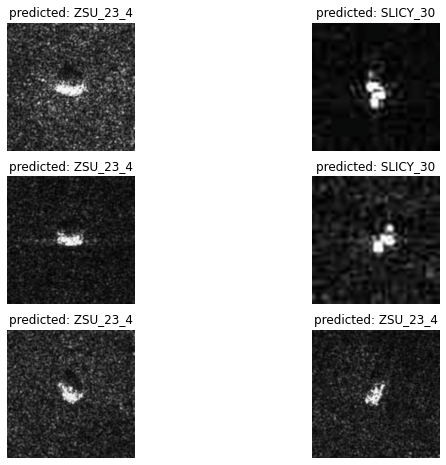

In [ ]:
evaluate_model(model, test_dl, device)
evaluate_model(model, train_dl, device)
visualize_model(model, train_dl, device)

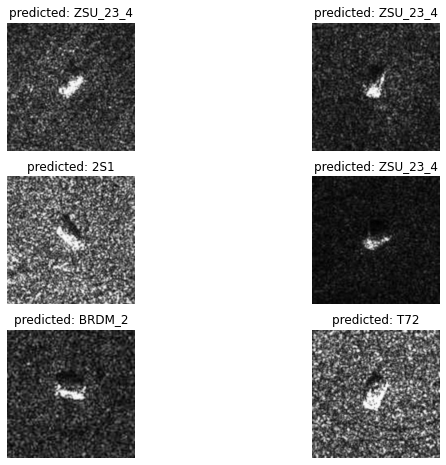

In [ ]:
visualize_model(model, train_dl, device)


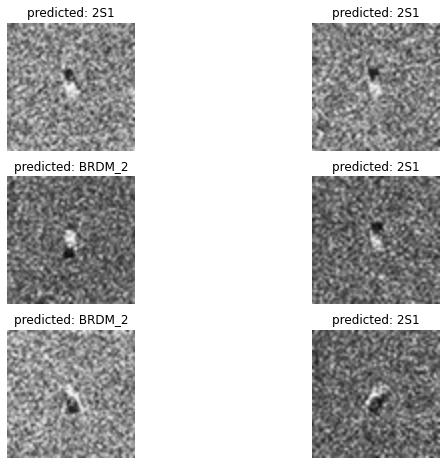

In [ ]:
visualize_model(model, test_dl, device)

100%|██████████| 60/60 [00:06<00:00,  9.77it/s]


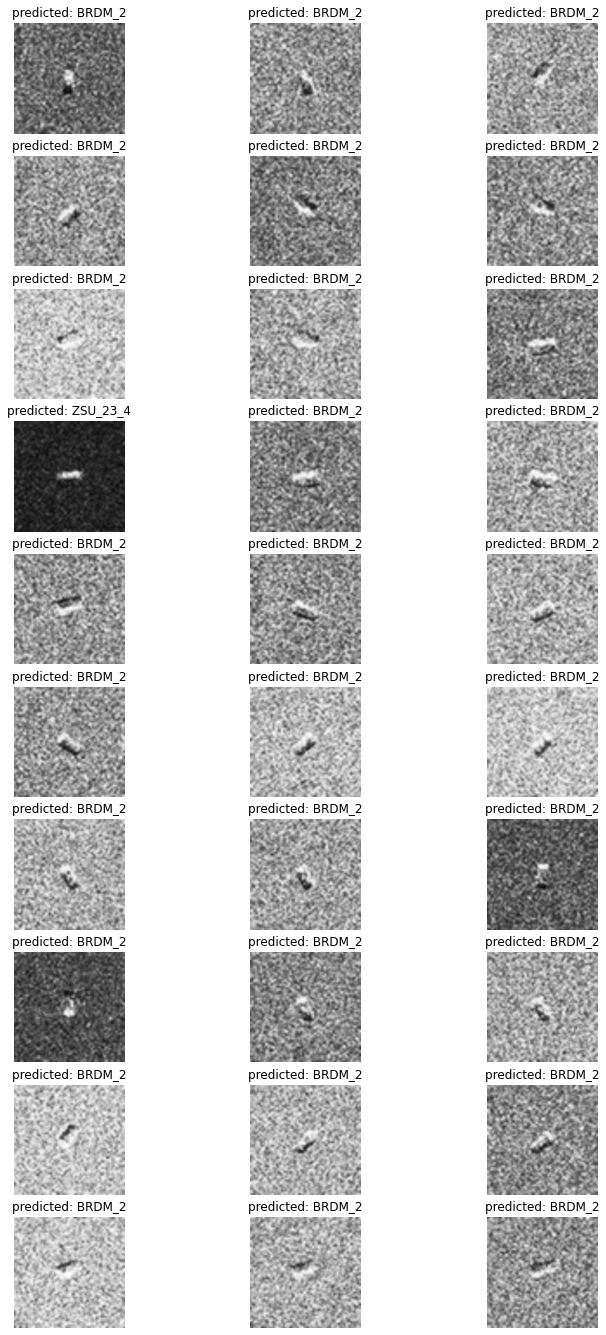

89 images out of 1899 were misclassified.


In [ ]:
plot_errors(model, test_dl, device)

100%|██████████| 60/60 [00:05<00:00, 11.01it/s]


[[0.07096774 0.87741935 0.01290323 0.00967742 0.02903226]
 [0.37352246 0.53427896 0.01654846 0.04255319 0.03309693]
 [0.         0.04620462 0.5379538  0.32673267 0.08910891]
 [0.25170068 0.38321995 0.08163265 0.20408163 0.07936508]
 [0.13033175 0.37440758 0.03080569 0.02132701 0.44312796]]


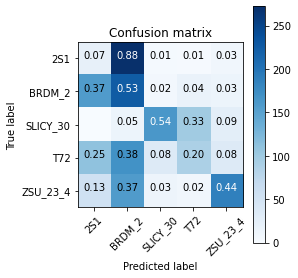

In [ ]:
y_pred, y_true = predict_class(model, test_dl, device)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_ds.classes, normalize=True, figsize=(4, 4))

Randomize & change training set in order to improve accuracy

In [ ]:
# Data augmentation and normalization for training
train_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.01),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Just normalization for validation
valid_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(f'{DATA_DIR}/train', train_transforms)
test_ds = datasets.ImageFolder(f'{DATA_DIR}/test', valid_transforms)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=True)

train_ds_sz = len(train_ds)
valid_ds_sz = len(test_ds)

print('Train size: {}\nValid size: {} ({:.2f})'.format(train_ds_sz, valid_ds_sz, valid_ds_sz/(train_ds_sz + valid_ds_sz)))

class_names = train_ds.classes

Train size: 1823
Valid size: 1899 (0.51)


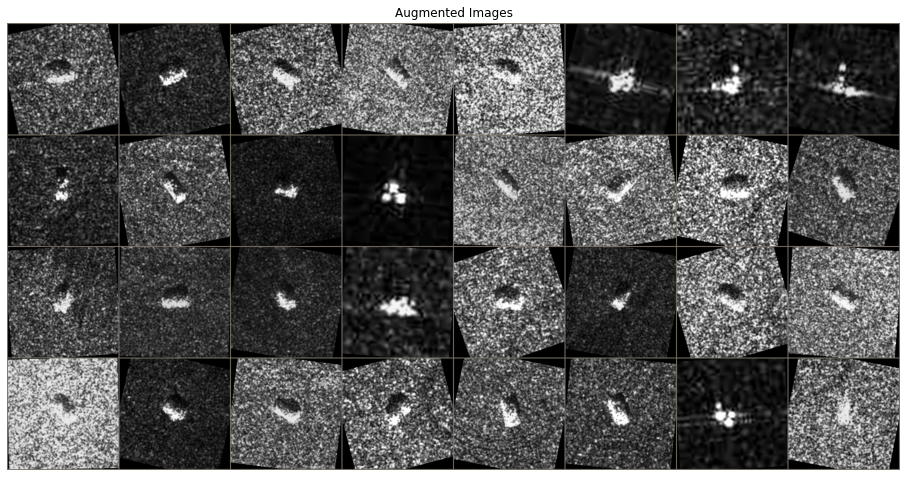

In [ ]:
inputs, targets = next(iter(train_dl))     # Get a batch of training data
out = torchvision.utils.make_grid(inputs)  # Make a grid from batch
plt.figure(figsize=(16., 12.))
imshow(out, title='Augmented Images');

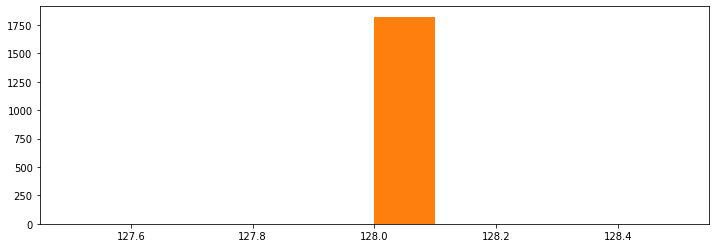

In [ ]:
fnames = glob.glob(f'{trn_dir}/*/*.JPG')
sizes = [Image.open(f).size for f in fnames]

hs, ws = list(zip(*sizes))

plt.figure(figsize=(12., 4.))
plt.hist(hs)
plt.hist(ws);

In [ ]:
# create model
model = SimpleCNN()
model = model.to(device)
    
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

# train
model = train_model(model, train_dl, valid_dl, criterion, optimizer, device, num_epochs=5)

Epoch 1/5
----------
  train Loss: 7.27510 Acc: 0.60121
  valid Loss: 10.17155 Acc: 0.37019

Epoch 2/5
----------
  train Loss: 0.97453 Acc: 0.81075
  valid Loss: 5.45306 Acc: 0.34439

Epoch 3/5
----------
  train Loss: 0.55910 Acc: 0.85354
  valid Loss: 7.41302 Acc: 0.36440

Epoch 4/5
----------
  train Loss: 0.32317 Acc: 0.90016
  valid Loss: 3.87208 Acc: 0.38915

Epoch 5/5
----------
  train Loss: 0.23759 Acc: 0.92704
  valid Loss: 2.94559 Acc: 0.45866

Training complete in 1m 49s
Best val Acc: 0.4587


In [ ]:
# load pre-trained ResNet18
model = load_pretrained_resnet50(model_path=None, num_classes=5)
model = model.to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch 1/2
----------
  train Loss: 0.71574 Acc: 0.72847
  valid Loss: 2.42526 Acc: 0.17009

Epoch 2/2
----------
  train Loss: 0.11436 Acc: 0.96434
  valid Loss: 4.13191 Acc: 0.15956

Training complete in 1m 19s
Best val Acc: 0.1701
accuracy: 15.96


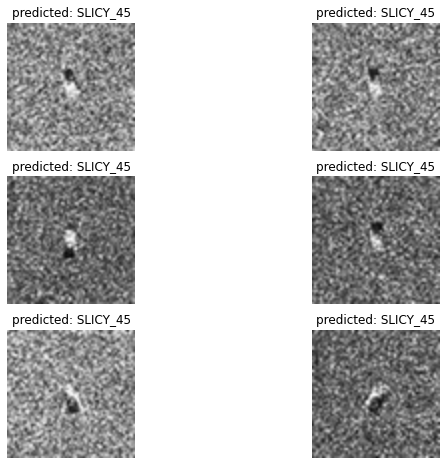

In [ ]:
model = train_model(model, train_dl, test_dl, criterion, optimizer, device, scheduler, num_epochs=2)
evaluate_model(model, test_dl, device)
visualize_model(model, test_dl, device, num_images=6)

100%|██████████| 60/60 [00:08<00:00,  7.27it/s]


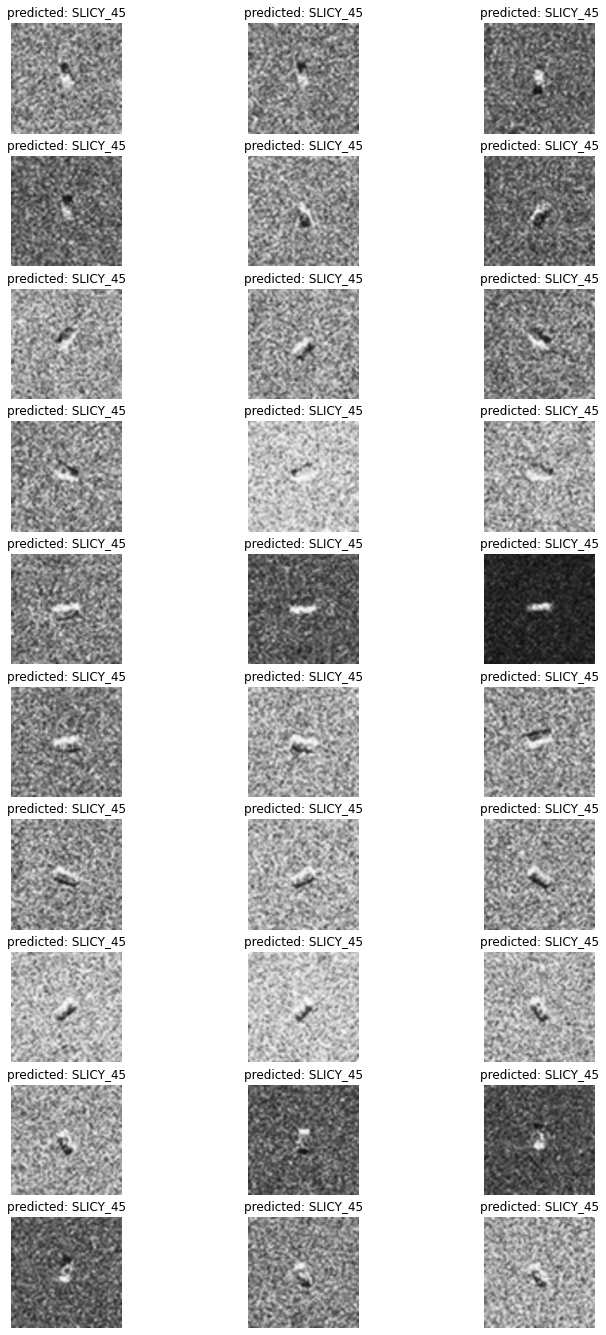

81 images out of 1899 were misclassified.


100%|██████████| 60/60 [00:06<00:00,  8.59it/s]


[[0.         0.00322581 0.99677419 0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.04081633 0.95918367 0.         0.        ]
 [0.         0.02606635 0.97393365 0.         0.        ]]


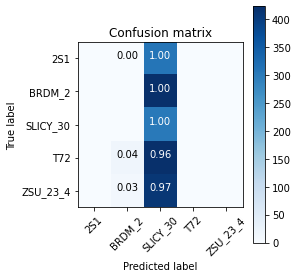

In [ ]:
plot_errors(model, test_dl, device)
y_pred, y_true = predict_class(model, test_dl, device)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_ds.classes, normalize=True, figsize=(4, 4))